In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


# <font color = blue> Bank loan Analysis  </font>

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

### With the help of analysis bank can save itself from two types of errors:
#### 1. Credit Loss - When consumer is not able to pay the loan but his application is approved by the bank.
#### 2. Interest Loss - When consumer is capable to pay the loan but his application is rejected.

## 1. Reading the data

 Reading the application data file provided and store it in a dataframe `app_data`.

In [150]:
#loading the data
app_data = pd.read_csv("D:application_data.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Data Inspection
####  - Info,Describe,Shape


In [152]:
# get the number of rows and columns in app_data dataframe
app_data.shape

(307511, 122)

In [153]:
# get the information of app_data dataframe
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [154]:
# describe the data to get statistical information
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### 3. Data preparation

- Drop columns with high null values(above400%)
- Impute other columns with fewer null values
- Mean,Median,Mode
- Outlier Analysis
- Solving Data quality issue 
- Binning continuous variables
       

In [155]:
#identify percentage of null values in columns
null_values = app_data.isnull().sum()/len(app_data)*100
null_values

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [156]:
# sort the percentage of null values in descending order
null_values.sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

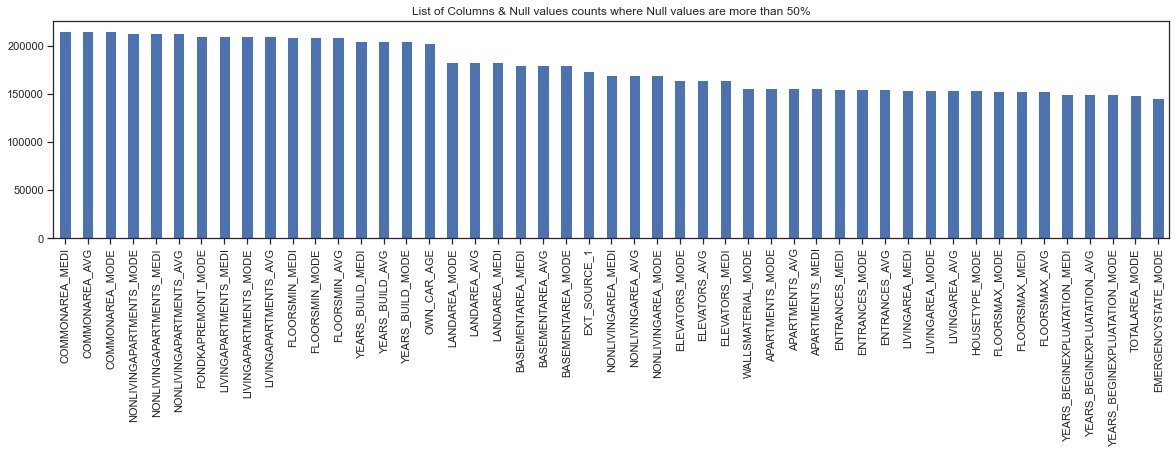

In [157]:
# store all the columns having more than 50% null values in new set called Null_coll
Null_coll = app_data.isnull().sum().sort_values(ascending = False)
Null_coll = Null_coll[Null_coll.values >(0.40*len(app_data))]

# plot a bar graph to see the list of columns having null values more than 50%
plt.figure(figsize=(20,4))
Null_coll.plot(kind='bar')
plt.title('List of Columns & Null values counts where Null values are more than 50%')
plt.show()


In [158]:
# find length of the dataset
len(Null_coll)

49

In [159]:
# define a new class and drop the columns 
def Nulls(dataframe,percent=0.40):
    df = dataframe.copy()
    ishape = df.shape
    colnames = (df.isnull().sum()/len(df))
    colnames = list(colnames[colnames.values>=percent].index)
    df.drop(labels = colnames,axis =1,inplace=True)        
    print("Number of Columns dropped\t: ",len(colnames))    
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)
    return df

In [160]:
# read to find the no. of dropped columns 
app_data = Nulls(app_data,percent = 0.40)

Number of Columns dropped	:  49

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 73)


In [161]:
# read the remaining columns that have null values
remaining_null_val = app_data.isnull().sum()/len(app_data)*100
remaining_null_val.sort_values(ascending =False).head(50)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_INCOME_TYPE                0.000000
FLAG_OWN_REALTY                 0.000000
TARGET                          0.000000
FLAG_EMAIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_CONT_MOBILE                0.000000
NAME_CONTRACT_TY

In [162]:
# describe the dataframe to see the changes
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


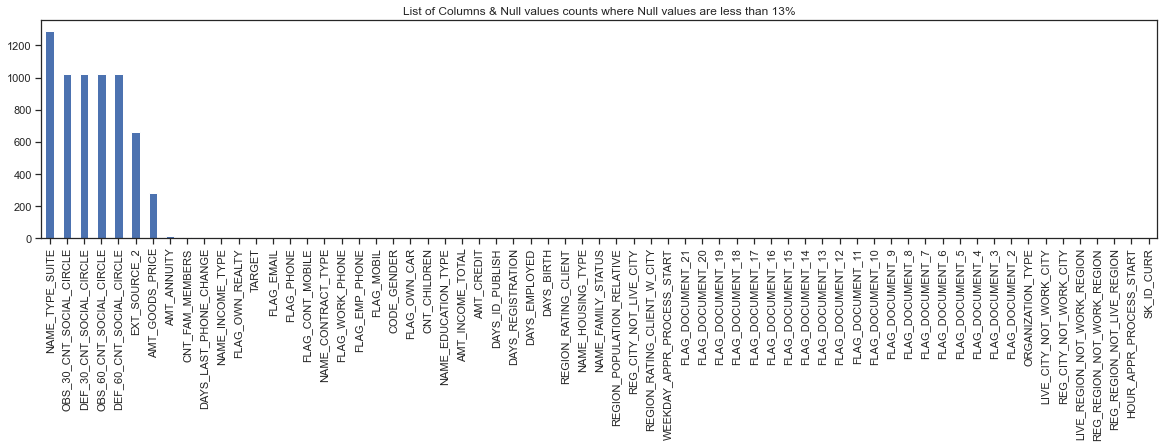

In [163]:
# store all the columns having less than 13% null values in new set called Null_coll2
Null_coll2 = app_data.isnull().sum().sort_values(ascending = False)
Null_coll2 = Null_coll2[Null_coll2.values <(0.13*len(app_data))]

# plot a bar graph to see the list of columns having null values less than 13%
plt.figure(figsize=(20,4))
Null_coll2.plot(kind='bar')
plt.title('List of Columns & Null values counts where Null values are less than 13%')
plt.show()




In [165]:
# get length of the Null_coll2
len(Null_coll2)

65

#### -Thus there are 65 columns in which there are null values less than 13% and all these columns are necessary for the analysis.

#### 3.1 Mean ,Median ,Mode

In [17]:
# check the null values in AMT_ANNUITY column
app_data.AMT_ANNUITY.isnull().sum()

12

In [18]:
# find median of AMT_ANNUITY column and store in med_annuity
med_annuity = app_data.AMT_ANNUITY.median()
med_annuity

24903.0

In [19]:
# fill all the null values in AMT_ANNUITY column with its median
app_data.loc[app_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=med_annuity

In [20]:
# check for null values in AMT_ANNUITY again
app_data.AMT_ANNUITY.isnull().sum()

0

###### Thus there are no null values in AMT_ANNUITY column now and analysis can be easily done on the column.
Similarly we will fill the null values of other essential columns and make them ready for analysis.
The columns are:
- AMT_GOODS_PRICE

In [21]:
# find median of AMT_GOODS_PRICE column fill the null values with the median
med_goods_price = app_data.AMT_GOODS_PRICE.median()
app_data.loc[app_data['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=med_goods_price
app_data.AMT_GOODS_PRICE.isnull().sum()

0

#### Check for the null values in other columns in app_data

In [166]:
# check for the null values in the columns
nullvalues = app_data.isnull().sum()
nullvalues.head(60)


SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

- Thus there are many categorical columns having null values.
- We can impute the missing values from this columns to mode.

In [167]:
# check the mode of OCCUPATION_TYPE column than impute the mode inplace of null values 
mode_occupation = app_data.OCCUPATION_TYPE.mode()
app_data.loc[app_data['OCCUPATION_TYPE'].isnull(),'OCCUPATION_TYPE']=mode_occupation

- Simillarly for the following columns we will find the mode and then replace the null values by mode:
1. AMT_REQ_CREDIT_BUREAU_YEAR
2. AMT_REQ_CREDIT_BUREAU_MON
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_DAY
5. AMT_REQ_CREDIT_BUREAU_HOUR
6. AMT_REQ_CREDIT_BUREAU_QRT

In [168]:
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [169]:
# impute the missing values in AMT_REQ_CREDIT_BUREAU_YEAR with mode
app_mode = app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_mode, inplace=True)

In [170]:
# impute the missing values in AMT_REQ_CREDIT_BUREAU_YEAR with mode
mon_mode = app_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_mode, inplace=True)

In [171]:
# impute the missing values in AMT_REQ_CREDIT_BUREAU_YEAR with mode
week_mode = app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(week_mode, inplace=True)

In [172]:
# impute the missing values in AMT_REQ_CREDIT_BUREAU_DAY with mode
day_mode = app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(day_mode, inplace=True)

In [173]:
# impute the missing values in AMT_REQ_CREDIT_BUREAU_HOUR with mode
hour_mode = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(hour_mode, inplace=True)

In [174]:
# impute the missing values in AMT_REQ_CREDIT_BUREAU_QRT with mode
qrt_mode = app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(qrt_mode, inplace=True)

### Checking for outliers

In [175]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
outlier_in_col = app_data.select_dtypes(include=numerics)

In [176]:
outlier_in_col.shape

(307511, 61)

In [177]:
outlier_in_col.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### Check for the outliers in the columns

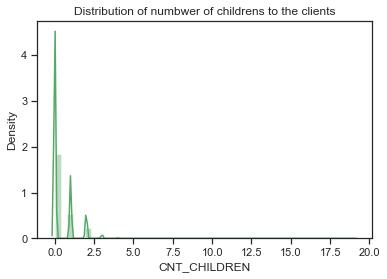

In [178]:
# plot of column CNT_CHILDREN 
sns.distplot(app_data.CNT_CHILDREN,color="g")
plt.title("Distribution of numbwer of childrens to the clients",fontsize=12)
plt.show()

- There are some outliers in the cnt_children values

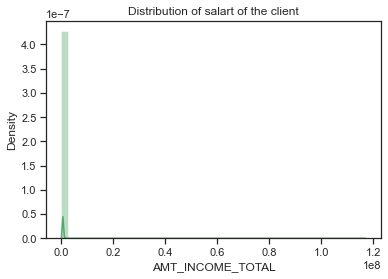

In [179]:
# plot of column total income
sns.distplot(app_data.AMT_INCOME_TOTAL,color="g")
plt.title("Distribution of salart of the client",fontsize=12)
plt.show()

- Thus there are large number of outliers in the income of the clients

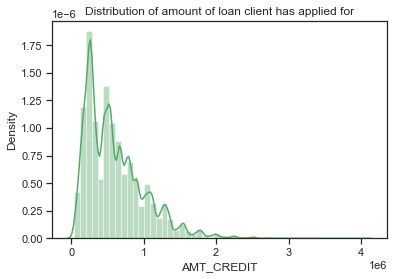

In [180]:
# plot of column AMT_CREDIT 
sns.distplot(app_data.AMT_CREDIT,color="g")
plt.title("Distribution of amount of loan client has applied for",fontsize=12)
plt.show()

- The credit value has less outliers that means large number of clints have applied for same amount of loan

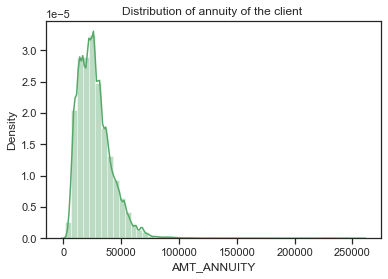

In [181]:
# plot of column AMT_ANNUITY 
sns.distplot(app_data.AMT_ANNUITY,color="g")
plt.title("Distribution of annuity of the client ",fontsize=12)
plt.show()

- The annuity distribution has less number of outliers

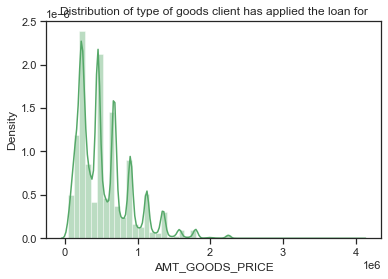

In [182]:
# plot of column amt_goods_price
sns.distplot(app_data.AMT_GOODS_PRICE,color="g")
plt.title("Distribution of type of goods client has applied the loan for",fontsize=12)
plt.show()

- The type of goods for which the client has applied for the loan is has high count

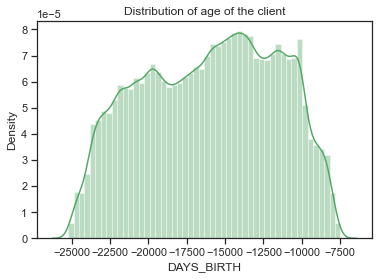

In [183]:
# plot of column DAYS_BIRTH 
sns.distplot(app_data.DAYS_BIRTH,color="g")
plt.title("Distribution of age of the client",fontsize=12)
plt.show()

- This column is likely to have no outliers

##### 3.2 Probing the quality of data

In [184]:
# Check if there are unwanted negative values in the columns starting from days
print(app_data['DAYS_BIRTH'])
print(app_data['DAYS_EMPLOYED'])
print(app_data['DAYS_REGISTRATION'])
print(app_data['DAYS_ID_PUBLISH'])
print(app_data['DAYS_LAST_PHONE_CHANGE'])

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64
0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64
0        -3648.0
1        -1186.0
2        -4260.0
3        -9833.0
4        -4311.0
           ...  
307506   -8456.0
307507   -4388.0
307508   -6737.0
307509   -2562.0
307510   -5128.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64
0        -2120
1         -291
2        -2531
3        -2437
4        -3458
          ... 
307506   -1982
307507   -4090
307508   -5150
307509    -931
307510    -410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64
0        -1134.0
1         -828.0
2         -815.0
3         -617.0
4        -11

In [185]:
#filter the columns that start with days and store in new set called filter_col
filter_col = [col for col in app_data if col.startswith('DAYS')]
filter_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [186]:
# converting the columns having negative sign in values to positive
app_data[filter_col]= abs(app_data[filter_col])

In [187]:
# print the columns to see if the conversion is done correctly
print(app_data['DAYS_BIRTH'])
print(app_data['DAYS_EMPLOYED'])
print(app_data['DAYS_REGISTRATION'])
print(app_data['DAYS_ID_PUBLISH'])
print(app_data['DAYS_LAST_PHONE_CHANGE'])

0          9461.0
1         16765.0
2         19046.0
3         19005.0
4         19932.0
           ...   
307506     9327.0
307507    20775.0
307508    14966.0
307509    11961.0
307510    16856.0
Name: DAYS_BIRTH, Length: 307511, dtype: float64
0            637.0
1           1188.0
2            225.0
3           3039.0
4           3038.0
            ...   
307506       236.0
307507    365243.0
307508      7921.0
307509      4786.0
307510      1262.0
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64
0         3648.0
1         1186.0
2         4260.0
3         9833.0
4         4311.0
           ...  
307506    8456.0
307507    4388.0
307508    6737.0
307509    2562.0
307510    5128.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64
0         2120.0
1          291.0
2         2531.0
3         2437.0
4         3458.0
           ...  
307506    1982.0
307507    4090.0
307508    5150.0
307509     931.0
307510     410.0
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: float64
0       

In [188]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [189]:
# check the null values in gender column
app_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [190]:
# impute F in place of XNA
app_data.loc[app_data.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
app_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [191]:
# check the value counts for column organisation type
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [192]:
# impute the XNA eith NaN
app_data = app_data.replace('XNA',np.NaN)
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [193]:
# check the format of days birth column
app_data.DAYS_BIRTH.value_counts()

13749.0    43
13481.0    42
18248.0    41
10020.0    41
10292.0    40
           ..
25027.0     1
7829.0      1
25029.0     1
24920.0     1
8017.0      1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [194]:
# convert the values in days_birth column from days to years
app_data['DAYS_BIRTH']= (app_data['DAYS_BIRTH']/365).astype(int)
app_data['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [195]:
# make a dataframe of all the numeric columns
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

app_data[numeric_columns]=app_data[numeric_columns].apply(pd.to_numeric)
app_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.3 Binning
Converting a continuous column into categorical column

Here we are binning two columns from application data file and save them them into a new column.
1. AMT_INCOME_TOTAL  
2. AMT_CREDIT 

In [47]:
# checking null values in AMT_INCOME_TOTAL column
app_data.AMT_INCOME_TOTAL.isnull().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: bool>

In [206]:
# Based on the Quantile Values,binning the values to its respective categories
def category_func(x):
    if x<337500 and x>=234000:
        return('HIGH')
    elif x<234000 and x>=147150:
        return('MODERATE')
    elif x<147150 and x>=112500:
        return('LOW')
    else:
        return("EXTREMLY LOW")
app_data["AMT_INCOME_RANGE"] = app_data.AMT_INCOME_TOTAL.apply(category_func)    
app_data["AMT_INCOME_RANGE"]    

0             MODERATE
1                 HIGH
2         EXTREMLY LOW
3                  LOW
4                  LOW
              ...     
307506        MODERATE
307507    EXTREMLY LOW
307508        MODERATE
307509        MODERATE
307510        MODERATE
Name: AMT_INCOME_RANGE, Length: 307511, dtype: object

In [207]:
# same binning process on AMT_CREDIT column
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=slots)

### 4. Divide the datadet into two datasets

#### target = 1 as client with payment difficulties or Defaulter clients
#### target = 0 as client with non-payment difficulties or Non-Defaulter clients


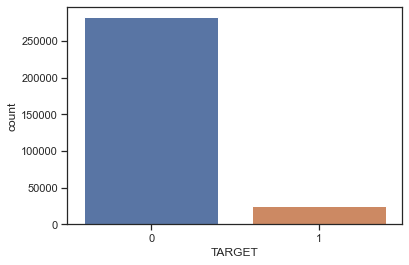

In [208]:
# distribution of target variable
Target_count= sns.countplot("TARGET",data =app_data)

- As we can see from the distribution of target variable there is  large amount of imbalance, so we will devide the target variable inti two diffrent data set and then do the analysis to get accurate inferences.

In [209]:
# Divide the dataset into two dataframes
non_defaulter_clients = app_data.loc[app_data["TARGET"]==0]
defaulter_clients = app_data.loc[app_data["TARGET"]==1]

In [210]:
# check info for both the non_defaulter clients
non_defaulter_clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   282686 non-null  int64   
 1   TARGET                       282686 non-null  int64   
 2   NAME_CONTRACT_TYPE           282686 non-null  object  
 3   CODE_GENDER                  282686 non-null  object  
 4   FLAG_OWN_CAR                 282686 non-null  object  
 5   FLAG_OWN_REALTY              282686 non-null  object  
 6   CNT_CHILDREN                 282686 non-null  int64   
 7   AMT_INCOME_TOTAL             282686 non-null  float64 
 8   AMT_CREDIT                   282686 non-null  float64 
 9   AMT_ANNUITY                  282674 non-null  float64 
 10  AMT_GOODS_PRICE              282429 non-null  float64 
 11  NAME_TYPE_SUITE              281464 non-null  object  
 12  NAME_INCOME_TYPE             282686 non-null

In [211]:
# check info of defaulter clients
defaulter_clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   24825 non-null  int64   
 1   TARGET                       24825 non-null  int64   
 2   NAME_CONTRACT_TYPE           24825 non-null  object  
 3   CODE_GENDER                  24825 non-null  object  
 4   FLAG_OWN_CAR                 24825 non-null  object  
 5   FLAG_OWN_REALTY              24825 non-null  object  
 6   CNT_CHILDREN                 24825 non-null  int64   
 7   AMT_INCOME_TOTAL             24825 non-null  float64 
 8   AMT_CREDIT                   24825 non-null  float64 
 9   AMT_ANNUITY                  24825 non-null  float64 
 10  AMT_GOODS_PRICE              24804 non-null  float64 
 11  NAME_TYPE_SUITE              24755 non-null  object  
 12  NAME_INCOME_TYPE             24825 non-null  object  
 13  

### 5. Univariate Analysis 

#### Univariate analysis of categorical columns
Following are the columns on which univariate analysis will be carried:

- We will be using  logarithmic scale and define a class 
1. NAME_INCOME_TYPE (Clients income type (businessman, working, maternity leave,…)
2. AMT_INCOME_RANGE (Range of the income total of client)
3. CODE_GENDER (Gender of the client)

In [212]:
# define a new class called category 
def category(df,col,title,hue =None):
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=360)
    # define logarithmic scale
    plt.yscale('log')
    plt.title(title)
    # define ax with the format of the countplot
    ax = sns.countplot(data = app_data, x= col, order=app_data[col].value_counts().index,hue = hue,palette='muted') 
        
    plt.show()
    return category

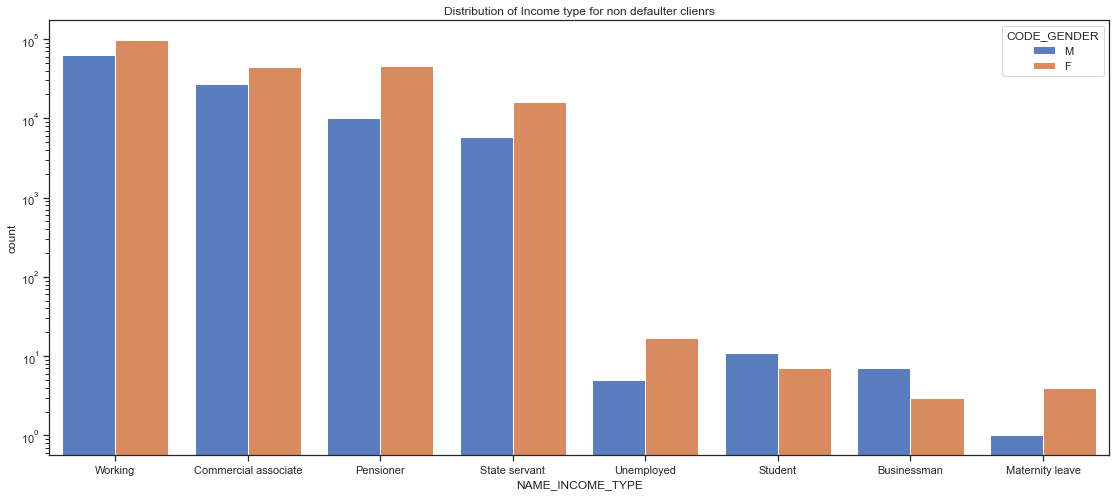

In [213]:
# plot of NAME_INCOME_TYPE for target 0
category(non_defaulter_clients,col='NAME_INCOME_TYPE',title='Distribution of Income type for non defaulter clienrs',hue='CODE_GENDER')
plt.show()

- The income of working women is more than male
- Females count of unemployement is more than male.

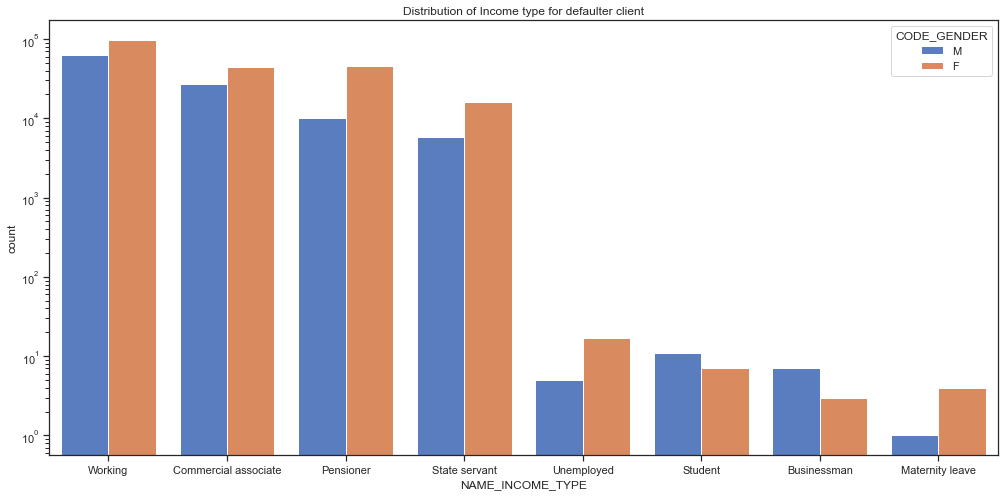

In [214]:
# plot of NAME_INCOME_TYPE for target 1
category(defaulter_clients,col='NAME_INCOME_TYPE',title='Distribution of Income type for defaulter client',hue='CODE_GENDER')
plt.show()

- There i negligible diffrence between defaulters and non defaulter client's income

- Distribution of amount income range for target 0 

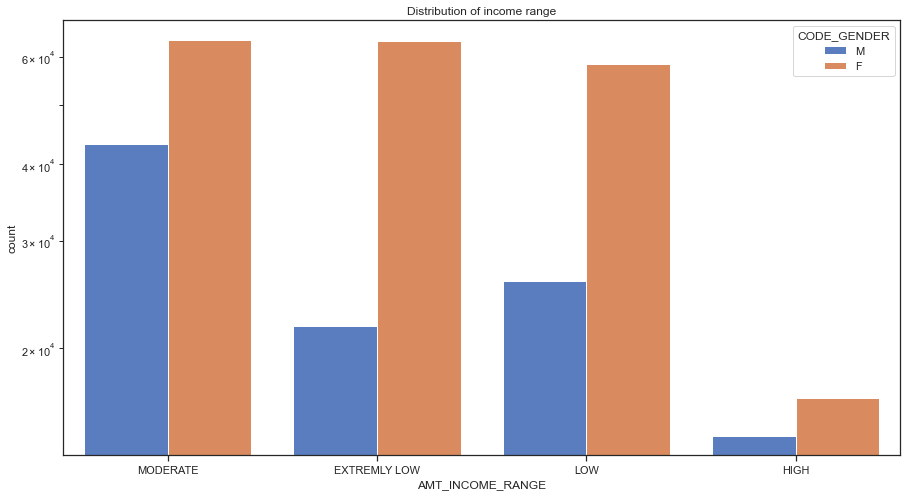

In [215]:
# plot of AMT_INCOME_RANGE for target 0
category(non_defaulter_clients,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')
plt.show()

- There is large count of females having extremely low income.

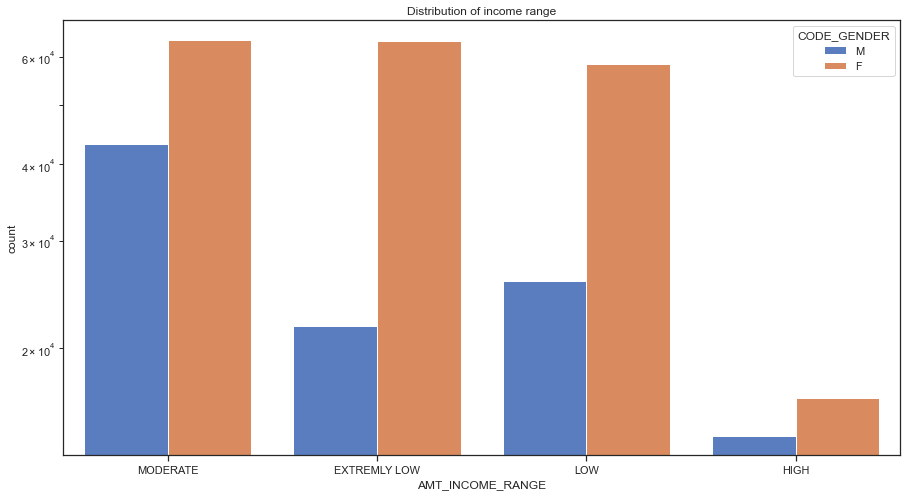

In [219]:
# plot of AMT_INCOME_RANGE for target 1 
category(defaulter_clients,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')
plt.show()

- The high income range has less count of male than female count.

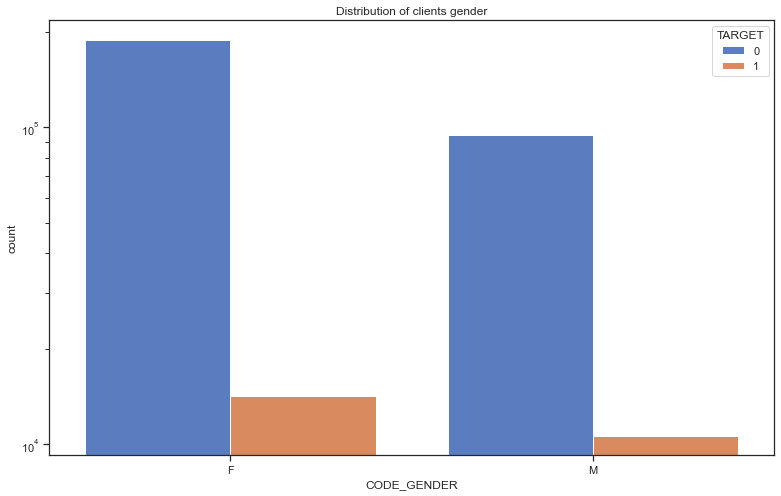

In [222]:
# distribution of gender for defaulter and non_defaulter clients
category(app_data,col='CODE_GENDER',title='Distribution of clients gender',hue='TARGET')
plt.show()

- From the above chart the Females are more likely to default the the loan as compared to male clients i.e target1.
- The taget 0 i.e non-defaulters percentage is also more in female clients

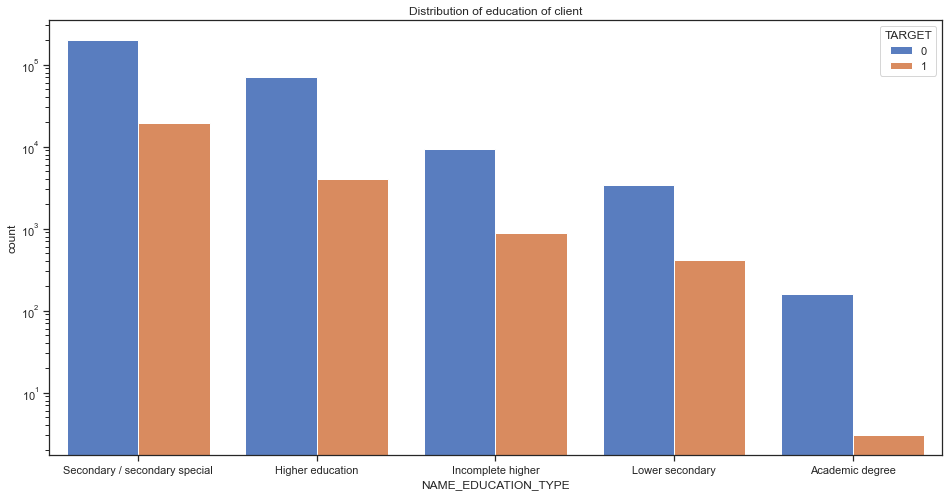

In [223]:
# plot for education of client based on gender 
category(app_data,col='NAME_EDUCATION_TYPE',title='Distribution of education of client',hue='TARGET')
plt.show()

- The clients with only academic degree are less likely to default the loan
- The clients with secondary special education have the highest amount of laon payment difficulties

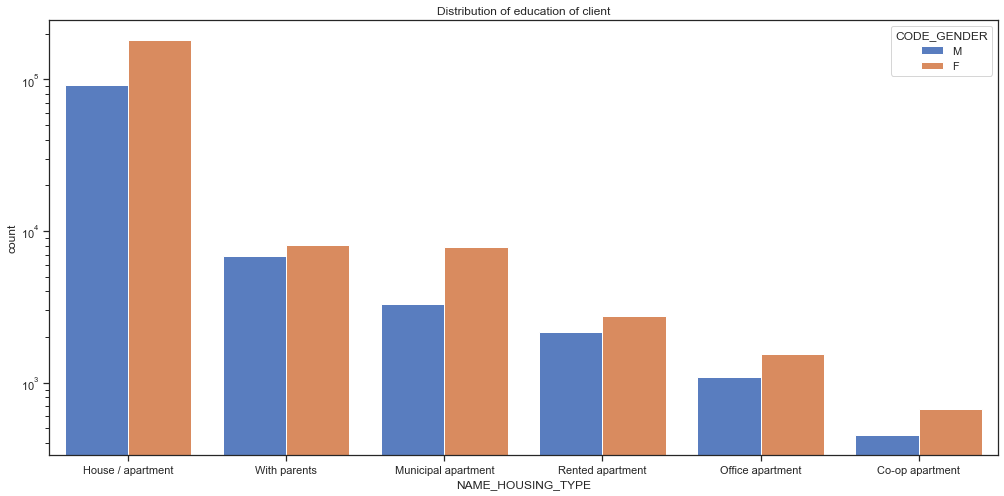

In [224]:
category(non_defaulter_clients,col='NAME_HOUSING_TYPE',title='Distribution of education of client',hue='CODE_GENDER')
plt.show()

- The female clients in all the categories of housing has more percentage then male clients for the non_defaulter_clients

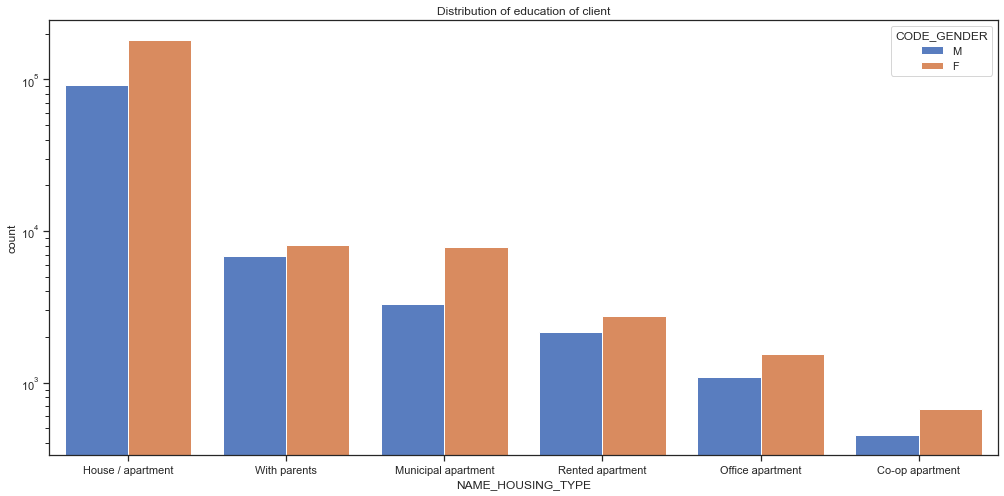

In [225]:
category(defaulter_clients,col='NAME_HOUSING_TYPE',title='Distribution of education of client',hue='CODE_GENDER')
plt.show()

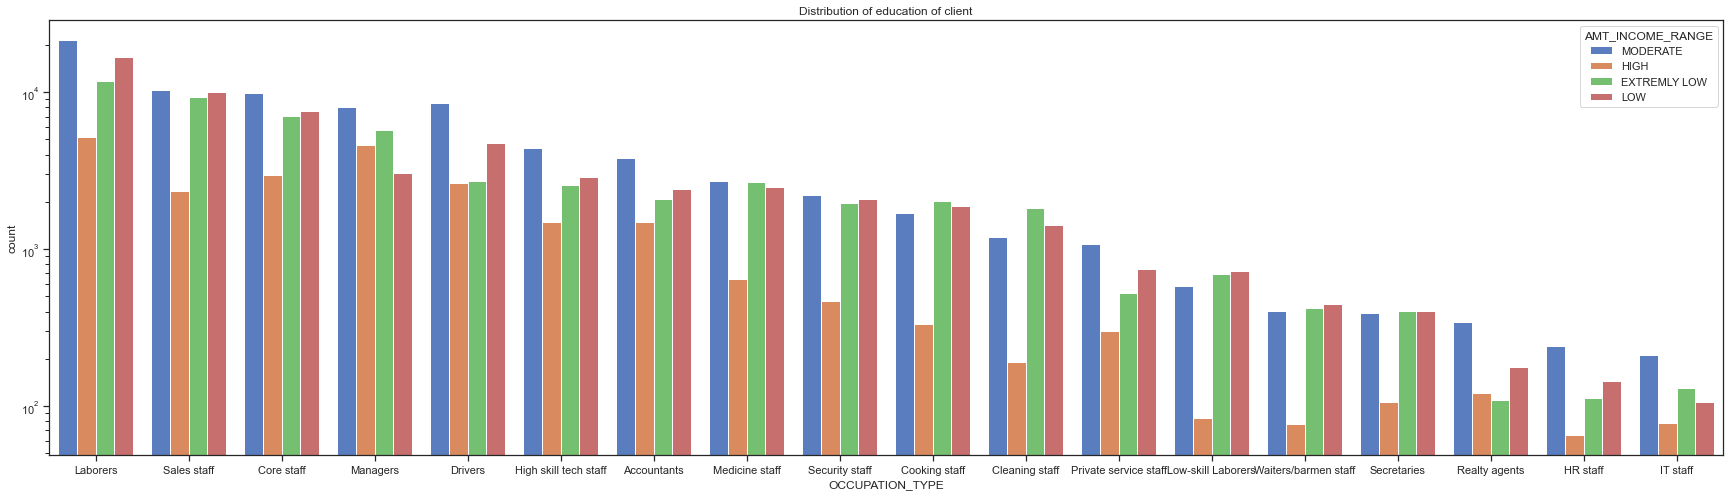

In [226]:
# plot for non_defaulter clients pn their occupation type based on the clients income type
category(non_defaulter_clients,col='OCCUPATION_TYPE',title='Distribution of education of client',hue='AMT_INCOME_RANGE')
plt.show()

- IT staff has good value of moderate income range.
- Labourers category has large count of low income range.

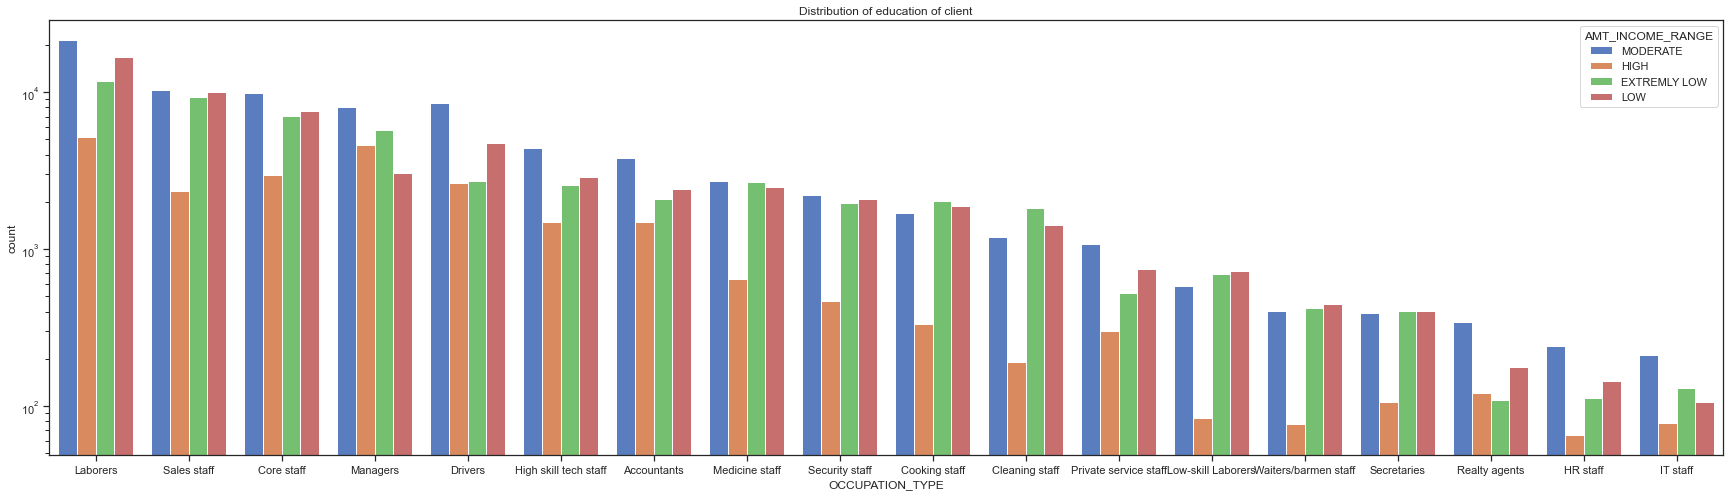

In [227]:
# plot for non_defaulter clients pn their occupation type based on the clients income type
category(defaulter_clients,col='OCCUPATION_TYPE',title='Distribution of education of client',hue='AMT_INCOME_RANGE')
plt.show()

- For the managers type of occupation type type of salies are moderately same, and these clients are more likely to be non defaulter clients.

### 5. Correlation between the defaulter and non defaulter clients 

In [228]:
# slicing the data in the defaulter and non defaulter and store in new dataframe called target0 target1
target0_corr=non_defaulter_clients.iloc[0:,2:21]
target1_corr=defaulter_clients.iloc[0:,2:21]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [229]:
# read the target0 dataframe
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
CNT_CHILDREN,1.000000,0.038308,0.002315,0.024767,-0.001293,-0.025551,-0.375611,-0.205693,-0.180517,0.019986
AMT_INCOME_TOTAL,0.038308,1.000000,0.416017,0.485699,0.419929,0.097772,-0.093418,-0.095898,-0.076387,-0.035931
AMT_CREDIT,0.002315,0.416017,1.000000,0.831900,0.985510,0.053570,0.057140,0.017986,-0.009416,0.001982
AMT_ANNUITY,0.024767,0.485699,0.831900,1.000000,0.830368,0.058591,-0.011725,-0.030195,-0.037717,-0.016569
AMT_GOODS_PRICE,-0.001293,0.419929,0.985510,0.830368,1.000000,0.062650,0.058242,0.022659,-0.009528,0.004018
REGION_POPULATION_RELATIVE,-0.025551,0.097772,0.053570,0.058591,0.062650,1.000000,0.030825,-0.003651,0.036684,0.010463
DAYS_BIRTH,-0.375611,-0.093418,0.057140,-0.011725,0.058242,0.030825,1.000000,0.583506,0.297997,0.261471
DAYS_EMPLOYED,-0.205693,-0.095898,0.017986,-0.030195,0.022659,-0.003651,0.583506,1.000000,0.201306,0.259900
DAYS_REGISTRATION,-0.180517,-0.076387,-0.009416,-0.037717,-0.009528,0.036684,0.297997,0.201306,1.000000,0.094153
DAYS_ID_PUBLISH,0.019986,-0.035931,0.001982,-0.016569,0.004018,0.010463,0.261471,0.259900,0.094153,1.000000


In [230]:
# read the target1 dataframe
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.007572,-0.031628,-0.267796,-0.127943,-0.133658,0.027320
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.362780,0.051463,0.007080,-0.036127,-0.036671,0.005929
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.977224,0.039919,0.154908,0.082434,0.017099,0.053780
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.804931,0.023297,0.030173,-0.003396,-0.035900,0.014472
AMT_GOODS_PRICE,-0.007572,0.362780,0.977224,0.804931,1.000000,0.054140,0.157548,0.092648,0.019172,0.059736
REGION_POPULATION_RELATIVE,-0.031628,0.051463,0.039919,0.023297,0.054140,1.000000,0.046166,0.020003,0.034315,0.023668
DAYS_BIRTH,-0.267796,0.007080,0.154908,0.030173,0.157548,0.046166,1.000000,0.466179,0.232933,0.250999
DAYS_EMPLOYED,-0.127943,-0.036127,0.082434,-0.003396,0.092648,0.020003,0.466179,1.000000,0.148988,0.209881
DAYS_REGISTRATION,-0.133658,-0.036671,0.017099,-0.035900,0.019172,0.034315,0.232933,0.148988,1.000000,0.095750
DAYS_ID_PUBLISH,0.027320,0.005929,0.053780,0.014472,0.059736,0.023668,0.250999,0.209881,0.095750,1.000000


<AxesSubplot:>

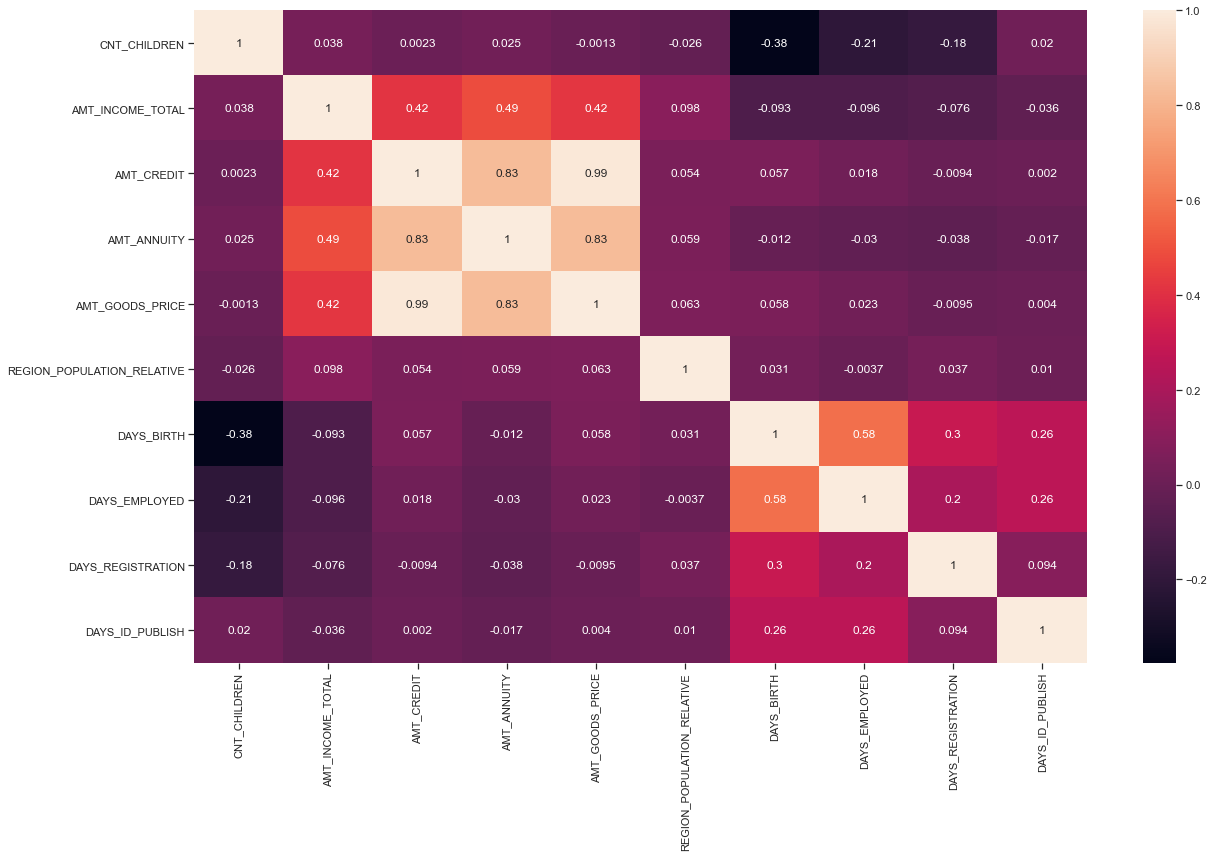

In [231]:
# plot the target 0 dataframe for non defaulter clients
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(target0,annot=True)

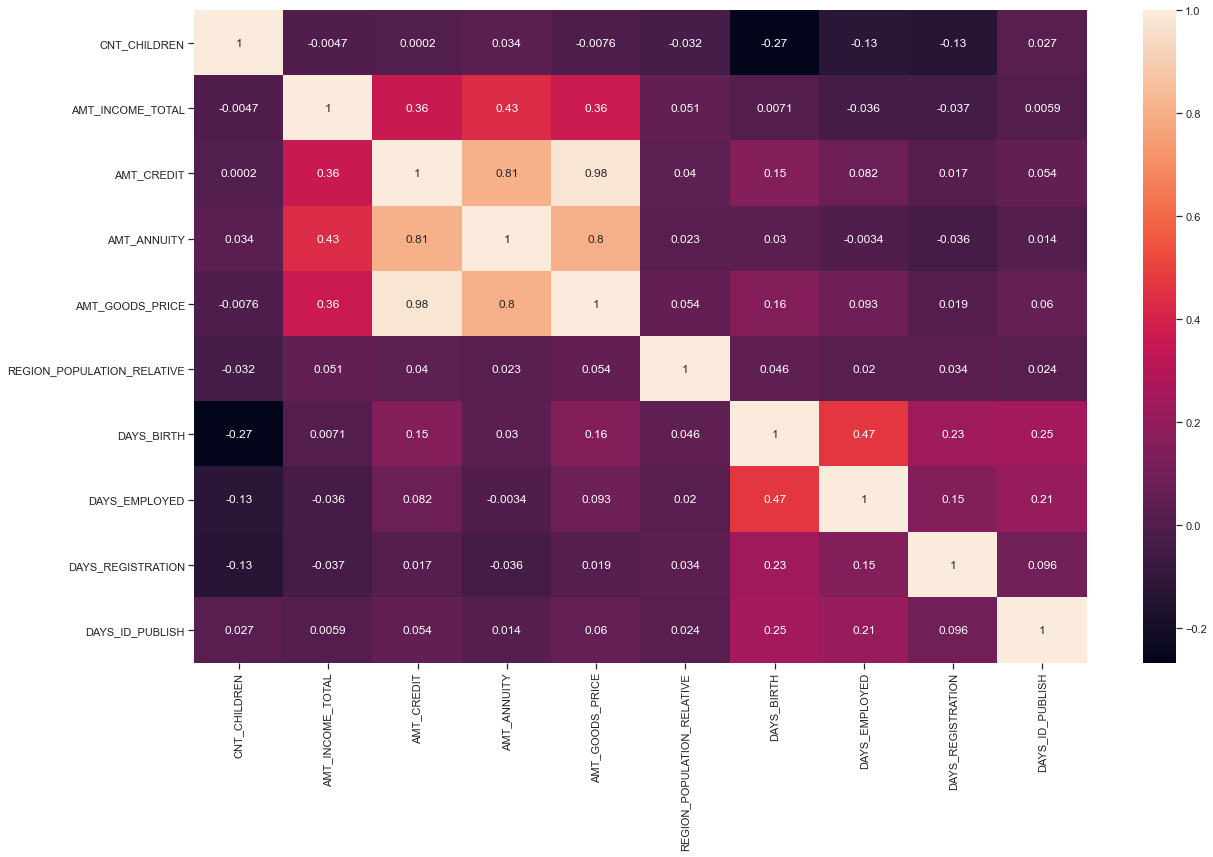

In [232]:
# plot heatmap for target1 dataframe i.e for defaulter clients
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(target1,annot=True)
plt.show()

# 6. Bivariate analysis 

### 6.1 Bivariate analysis of Category vs Numeric columns
Following are the categorical and numeric variables on which bivariate analysis will be done:
1. NAME_EDUCATION_TYPE vs AMT_CREDIT (target0 & target 1)
2. NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL (target0 & TARGET1)
3. NAME_HOUSING_TYPE vs DAYS_BIRTH (target 0 & target 1)

- NAME_EDUCATION_TYPE vs AMT_CREDIT for non-defaulter clients

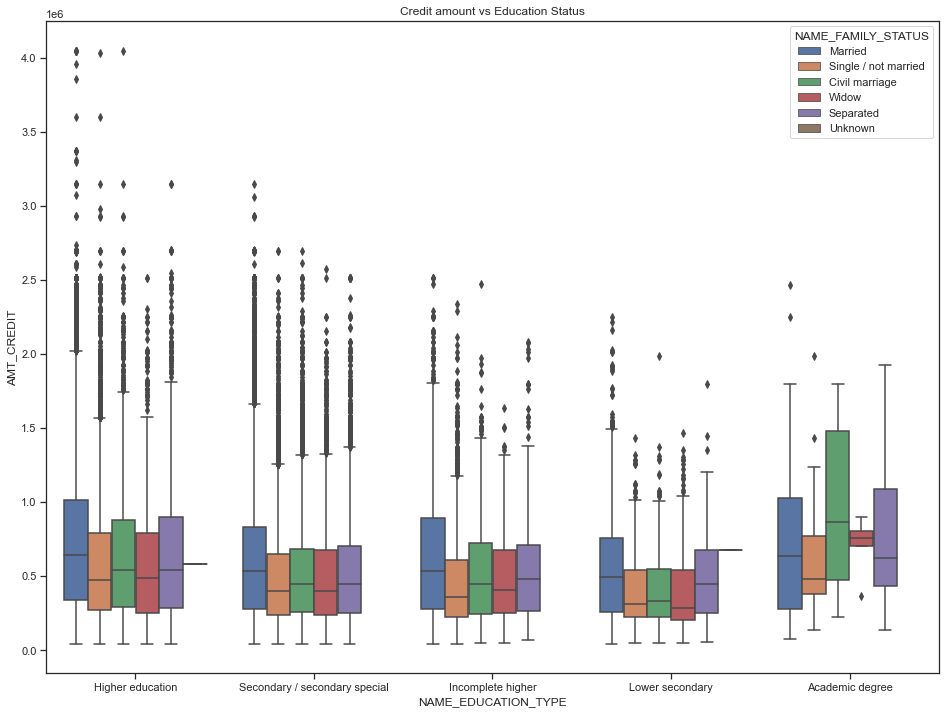

In [87]:
# plot for non_defaulter clients
plt.figure(figsize=(16,12))
plt.xticks(rotation=360)
sns.boxplot(data =non_defaulter_clients, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

- Civil marriage category clients as high eduvation count

- NAME_EDUCATION_TYPE vs AMT_CREDIT for non-defaulter clients

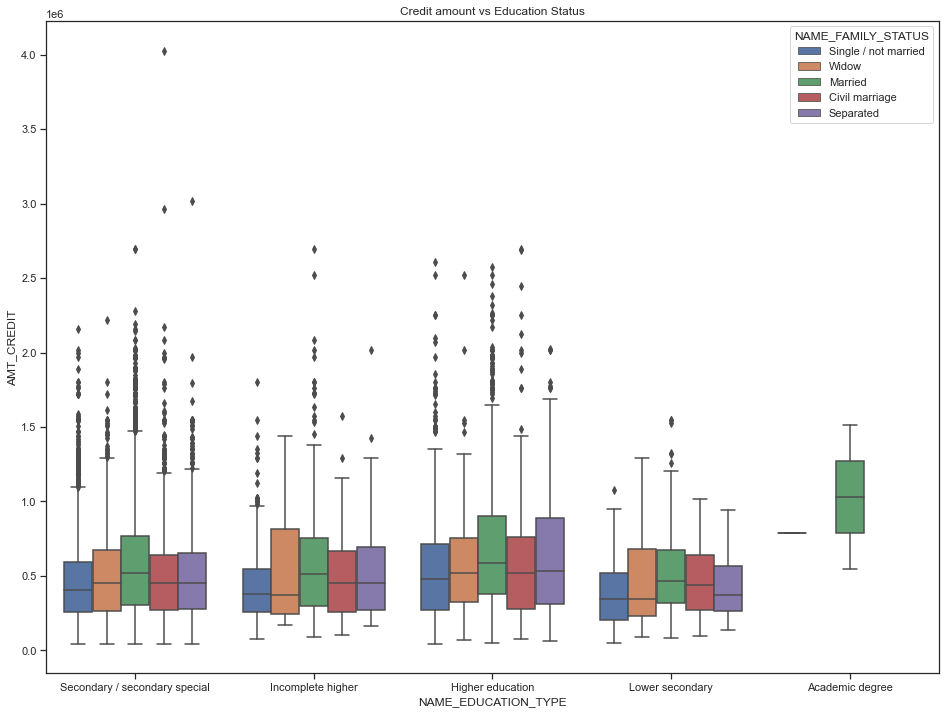

In [88]:
# plot for defaulter clients
plt.figure(figsize=(16,12))
plt.xticks(rotation=360)
sns.boxplot(data =defaulter_clients, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

- separated status client's has higher education count.

- NAME_EDUCATION_TYPE vs AMT_INCOME_RANGE for non-defaulter clients

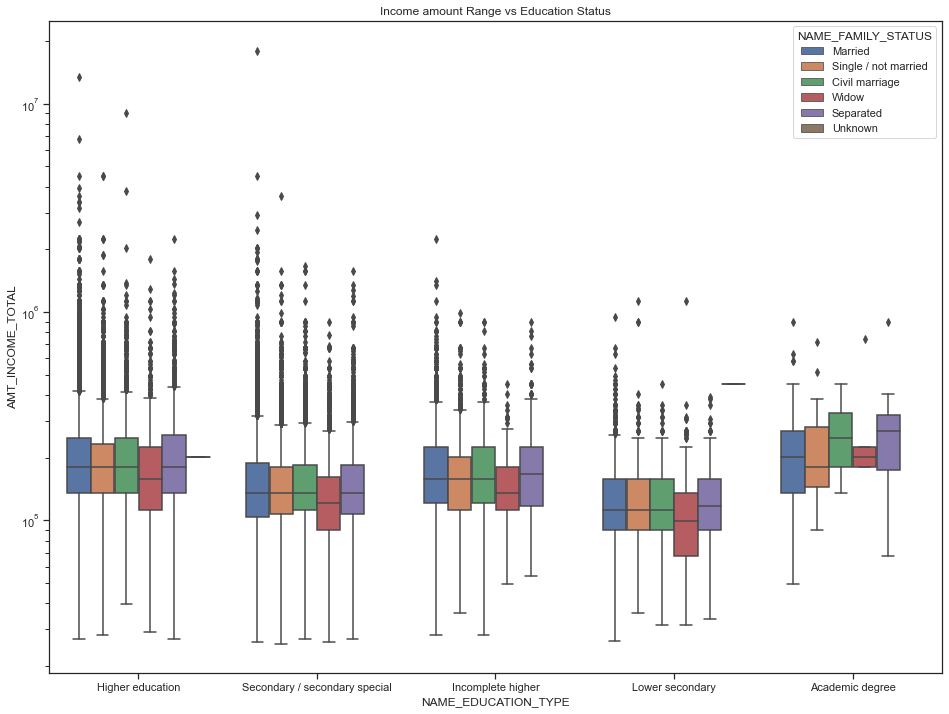

In [233]:
# plot for non_defaulter clients
plt.figure(figsize=(16,12))
plt.xticks(rotation=360)
plt.yscale('log')
sns.boxplot(data =non_defaulter_clients, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount Range vs Education Status')
plt.show()

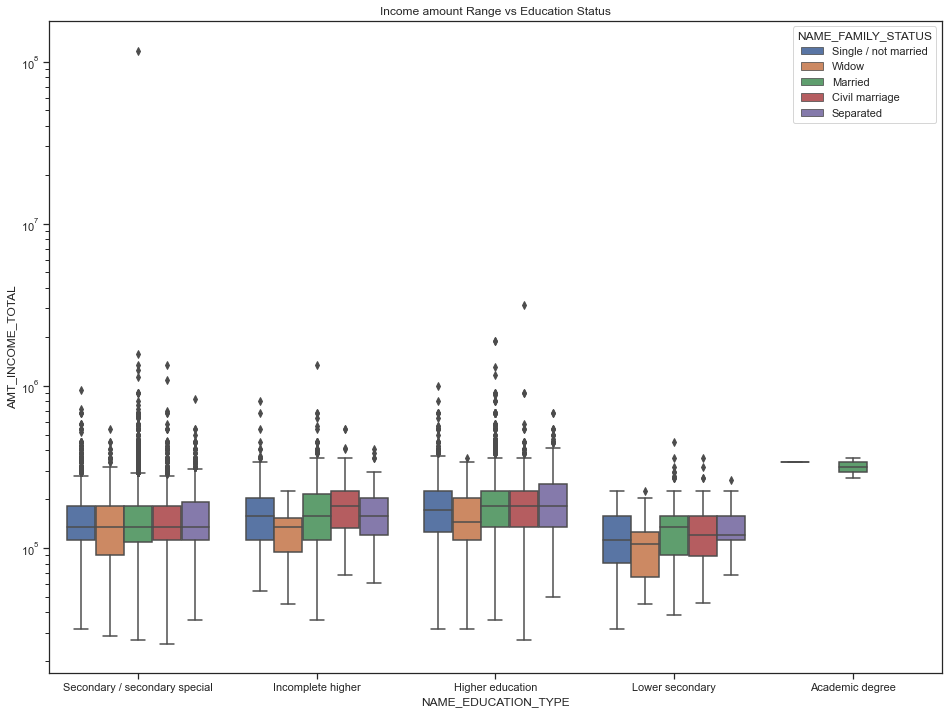

In [234]:
# plot for defaulter clients
plt.figure(figsize=(16,12))
plt.xticks(rotation=360)
plt.yscale('log')
sns.boxplot(data =defaulter_clients, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount Range vs Education Status')
plt.show()

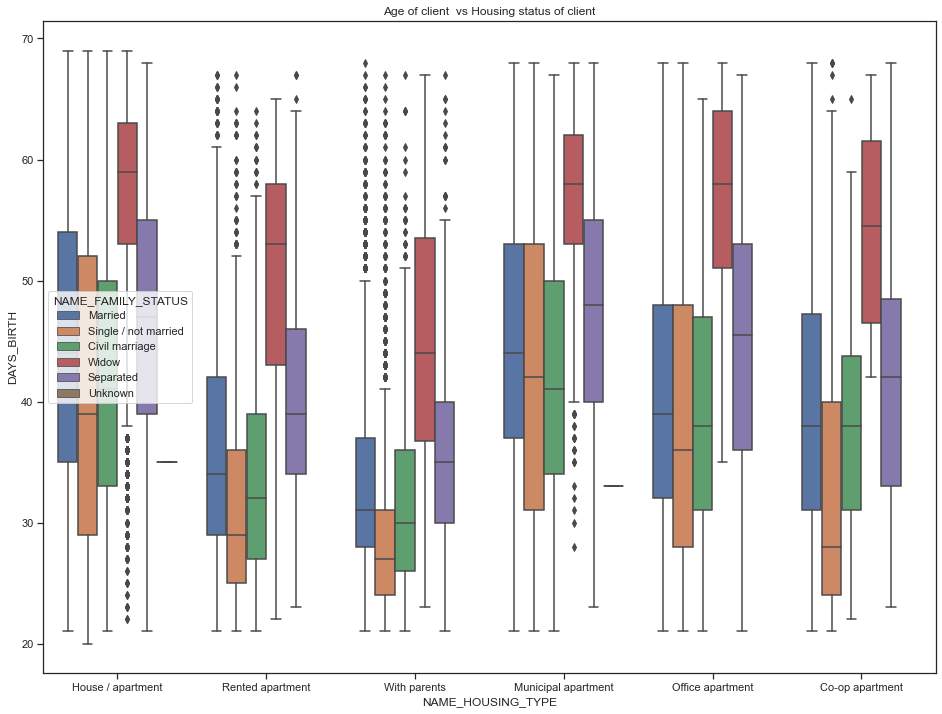

In [235]:
# plot for non_defaulter clients
plt.figure(figsize=(16,12))
plt.xticks(rotation=360)
sns.boxplot(data =non_defaulter_clients, x='NAME_HOUSING_TYPE',y='DAYS_BIRTH', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Age of client  vs Housing status of client')
plt.show()

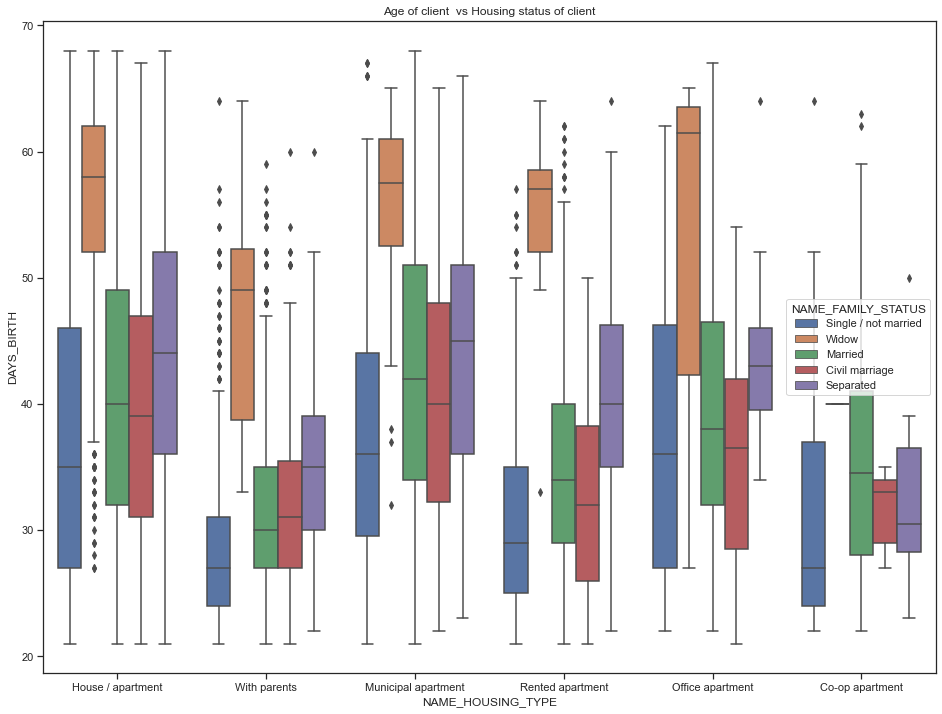

In [236]:
# plot for defaulter clients
plt.figure(figsize=(16,12))
plt.xticks(rotation=360)
sns.boxplot(data = defaulter_clients, x='NAME_HOUSING_TYPE',y='DAYS_BIRTH', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Age of client  vs Housing status of client')
plt.show()

### 6.2 Bivariate analysis of Categorical vs Categorical columns
Following are the categorical and categorical variables on which bivariate analysis will be done:
1. NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS
2. NAME_INCOME_TYPE CNT_FAM_MEMBERS
3. CNT_FAM_MEMBERS","REG_CITY_NOT_LIVE_CITY

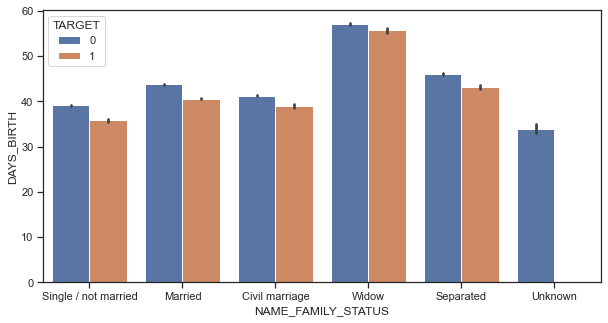

In [238]:
# plot for defaulter and non defaulter clients of their family status and age of clients
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_FAMILY_STATUS","DAYS_BIRTH",data=app_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=360)
plt.show()

- Civil marriage clients are more likely to have same age.

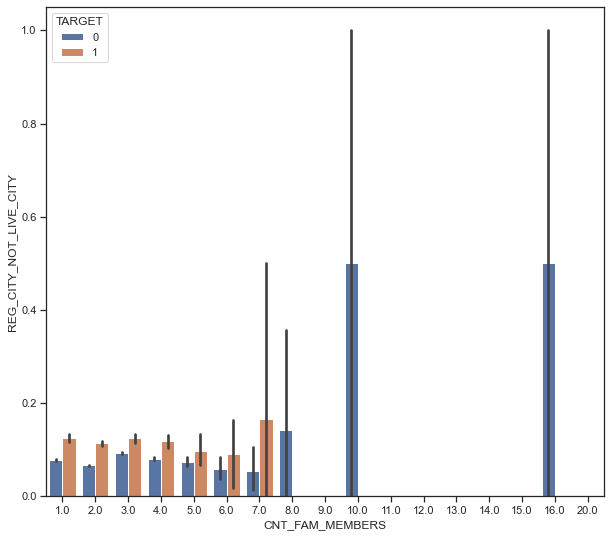

In [239]:
# plot for defaulter and non defaulter client's count of family members to the region of city thr currently live in
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("CNT_FAM_MEMBERS","REG_CITY_NOT_LIVE_CITY",data=app_data,hue="TARGET")
plt.show()

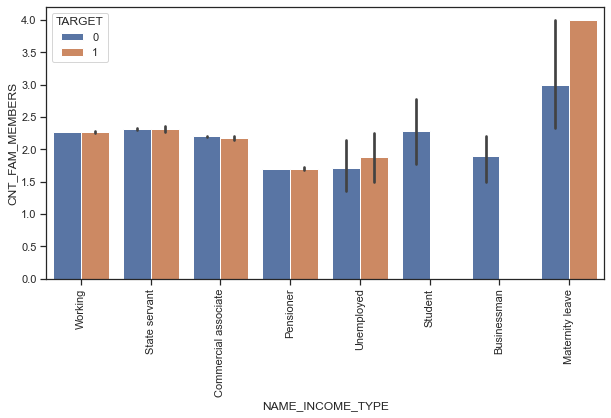

In [240]:
# plot for defaulter and non defaulters clients between their income type and amount of family members in the family
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_INCOME_TYPE","CNT_FAM_MEMBERS",data=app_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)
plt.show()

### 6.3 Bivariate analysis of Numerical vs Numerical columns
Following are the numerical and numeric variables on which bivariate analysis will be done:
1. AMT_CREDIT VS AMT_GOODS_PRICE 
2. AMT_ANNUITY VS AMT_INCOME_RANGE
3. AMT_ANNUITY VS AMT_CREDIT

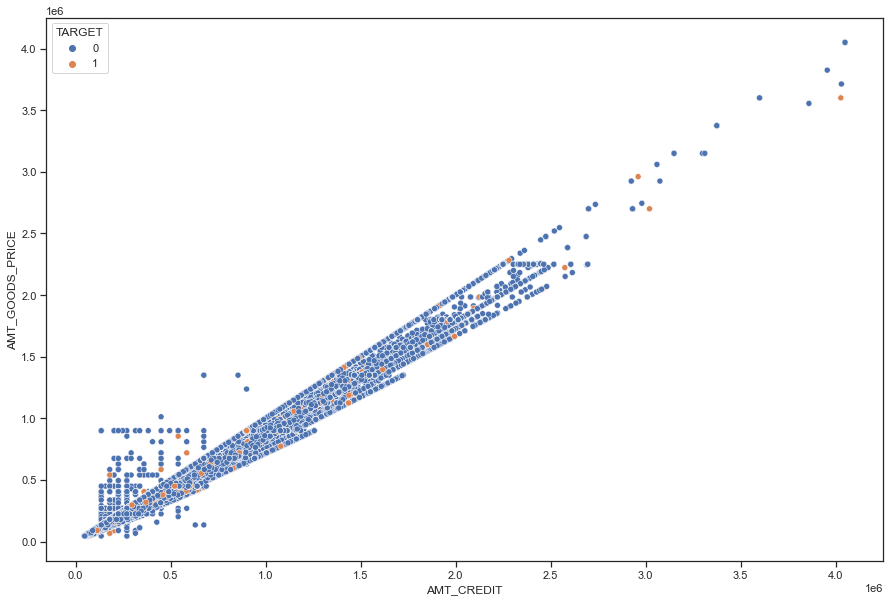

In [241]:
# plot for numerical value variables of credit the client has to pay with the goods for which client has applied for
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot("AMT_CREDIT","AMT_GOODS_PRICE",data=app_data,hue="TARGET")
plt.show()

- There are many low counts for goods price credit of loan of the clients

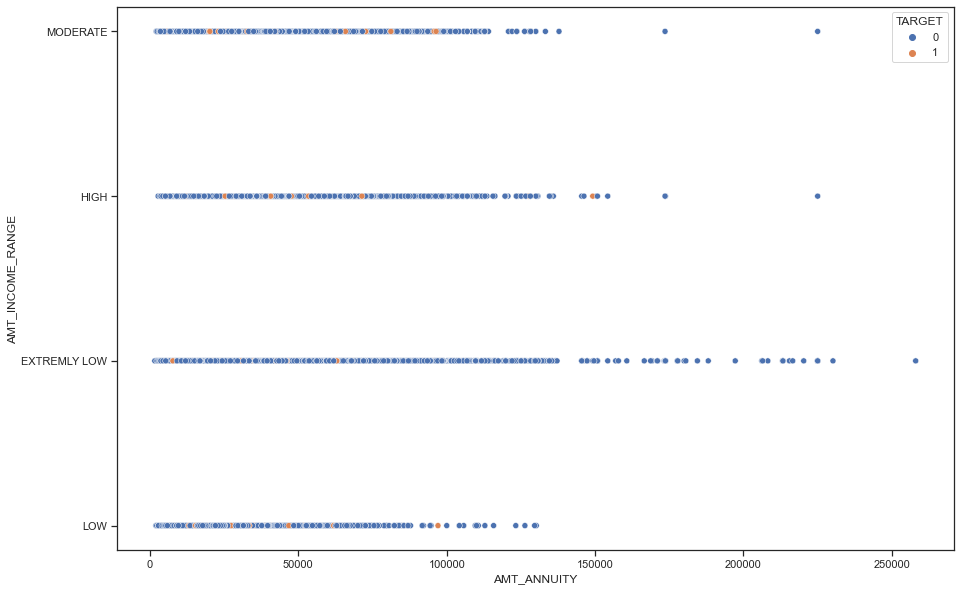

In [242]:
# plot of defaulter and non defaulter clients for annuint amount and the income of the client 
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot("AMT_ANNUITY","AMT_INCOME_RANGE",data=app_data,hue="TARGET")
plt.show()

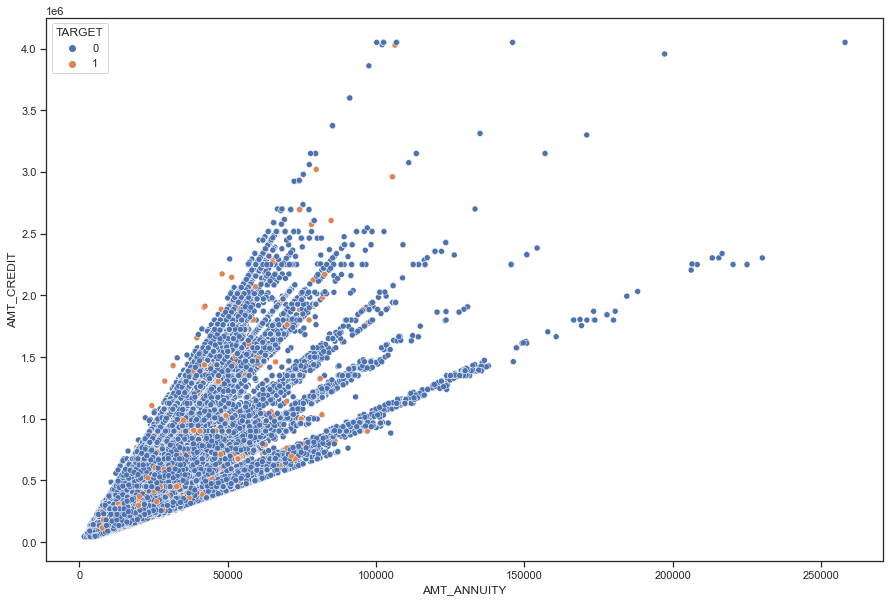

In [243]:
# plot for amount annuity and credit amount applied by the client for defaulter and non defaulter clients
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot("AMT_ANNUITY","AMT_CREDIT",data=app_data,hue="TARGET")
plt.show()

# <font color = black> EDA Casestudy analysis on previous applications file </font>

 ##  1. Reading the data

In [105]:
# read the data
preapp_data = pd.read_csv("D:/previous_application.csv")
preapp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
# get information of rows anf columns
preapp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [246]:
# apply describe function to get numerical statistics
preapp_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,8.806797e+02,3.139511e+02,1.605408e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,2.800000e+02,-1.000000e+00,6.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,1.300000e+03,8.200000e+01,2.400000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [247]:
# check the percentage of null values
null_val = preapp_data.isnull().sum()/len(preapp_data)*100
null_val

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.020716
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE         95.830774
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE              37.563091
CODE_REJECT_REASON             81.327123
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.116213
NAME_GOODS_CATEGORY            56.927376
NAME_PORTFOLIO                 22.286366
NAME_PRODUCT_TYP

In [248]:
# sort the null values in ascending order
null_val.sort_values(ascending = False).head(50)

RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE         95.830774
CODE_REJECT_REASON             81.327123
NAME_PRODUCT_TYPE              63.684414
NAME_GOODS_CATEGORY            56.927376
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_SELLER_INDUSTRY           51.234153
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_TERMINATION               40.298129
NAME_PAYMENT_TYPE              37.563091
NAME_YIELD_GROUP               30.966990
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
NAME_PORTFOLIO                 22.286366
NAME_CLIENT_TYPE                0.116213
NAME_CONTRACT_TYPE              0.020716
PRODUCT_COMBINAT

In [249]:
# drop the columns having large amount of null values
preapp_data.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','RATE_DOWN_PAYMENT','AMT_DOWN_PAYMENT','NAME_TYPE_SUITE'],axis=1)        



,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,NaN,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,NaN,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,NaN,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,508.0,362.0,358.0,351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,Furniture,12.0,middle,POS industry with interest,365243.0,1604.0,1274.0,1304.0,1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,1457.0,1187.0,1187.0,1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,1155.0,825.0,825.0,817.0,1.0


### 2. Converting negative values to positive and XNA,XAP to NaN

1.There are some columns with negative sign that cannot be negative like DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_TERMINATION,etc. Thus converting all the negative values in days columns to positive values.

2.Replacing all the XAP & XAN present in the dataframe to NaN.

In [250]:
# apply abs function on for all the columns starting with days 
days_coll = [col for col in preapp_data if col.startswith('DAYS')]
preapp_data[days_coll]= abs(preapp_data[days_coll])

In [251]:
preapp_data=preapp_data.replace('XNA', np.NaN)
preapp_data=preapp_data.replace('XAP', np.NaN)

In [252]:
preapp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,NaN,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,NaN,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,NaN,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## 3.Univariate Analysis

### 3.1 Univariate analysis of numeric columns

From the given data there are three major areas(numeric columns) on which univariate analysis can be done to get the consequences.
1. AMT_ANNUITY (Annuity of previous application)
2. AMT_CREDIT (Final credit amount on the previous application)
3. AMT_GOODS_PRICE (Goods price of good that client asked for (if applicable) on the previous application)

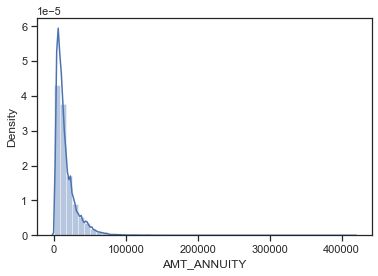

In [253]:
# plot for amount of annuity client has to pay
sns.distplot(preapp_data.AMT_ANNUITY)
plt.show()

#### Inferences:From boxplot and distribution plot
It can be observed that there are some outliers and the curve is not normal curve.

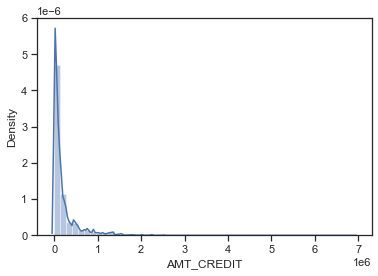

In [254]:
# plot for amount of credit client applied in previous applications
sns.distplot(preapp_data.AMT_CREDIT)
plt.show()

- There are many outliers in amount credit variables

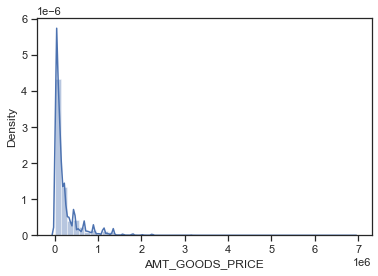

In [255]:
# plot for the goods client has applied the loan for
sns.distplot(preapp_data.AMT_GOODS_PRICE)
plt.show()

#### Looking at the above numeric columns together by using pair plt for distribution

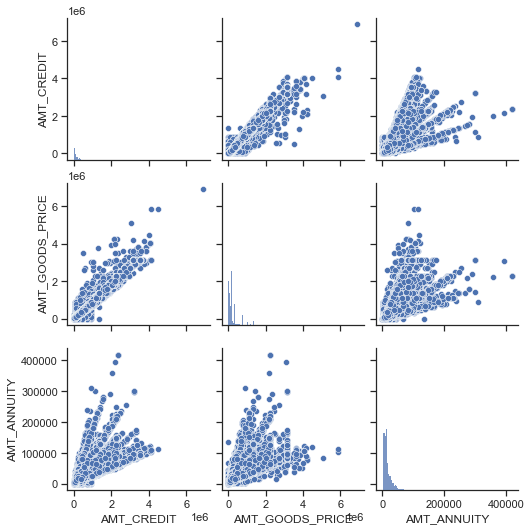

In [256]:
# plot a pairplot for all the three amount columns
sns.pairplot(preapp_data[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY']])
plt.show()

 Thus there are outliers in the columns.

### 3.2 Univariate analysis of categorical columns

From the given data there are these columns on which univariate analysis can be done and percentage oriented decisions can be made.Such columns are:
1. NAME_CONTRACT_STATUS (Contract status (approved, cancelled,refused,unused offer) of previous application
2. NAME_PAYMENT_TYPE (Payment method that client chose to pay for the previous application)
3. CODE_REJECT_REASON (Why was the previous application rejected)
4. NAME_CLIENT_TYPE (Was the client old or new client when applying for the previous application)
5. NAME_PORTFOLIO (Was the previous application for CASH, POS, CAR, …)
6. NAME_GOODS_CATEGORY (What kind of goods did the client apply for in the previous application)

In [257]:
# make a new data set
Contract_Status = preapp_data['NAME_CONTRACT_STATUS']
Contract_Status

0          Approved
1          Approved
2          Approved
3          Approved
4           Refused
             ...   
1670209    Approved
1670210    Approved
1670211    Approved
1670212    Approved
1670213    Approved
Name: NAME_CONTRACT_STATUS, Length: 1670214, dtype: object

In [258]:
#find the percentage of contract status 
df_1=round((Contract_Status.value_counts()/preapp_data["NAME_CONTRACT_STATUS"].count())*100,2)
df_1 = pd.DataFrame(df_1)
df_1.reset_index(level=0, inplace=True)
df_1.rename(columns=  {"index": "NAME_CONTRACT_STATUS", 
                     "NAME_CONTRACT_STATUS":"Percentage_of_Values"}, 
                                 inplace = True) 
df_1.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_1

,NAME_CONTRACT_STATUS,Percentage_of_Values
0,Approved,62.07
1,Canceled,18.94
2,Refused,17.40
3,Unused offer,1.58


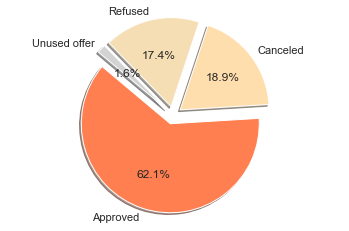

In [259]:
# Data to plot
labels = 'Approved', 'Canceled', 'Refused', 'Unused offer'
sizes = df_1['Percentage_of_Values']
colors = ['coral', 'navajowhite', 'wheat', 'lightgray']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Inference:Thus we can see that in previous applications maximum applications were approved.

In [260]:
# make a new dataset for client type
Client_Type = preapp_data['NAME_CLIENT_TYPE']
Client_Type

0           Repeater
1           Repeater
2           Repeater
3           Repeater
4           Repeater
             ...    
1670209    Refreshed
1670210          New
1670211     Repeater
1670212     Repeater
1670213     Repeater
Name: NAME_CLIENT_TYPE, Length: 1670214, dtype: object

In [261]:
#find the percentage of contract status 
df_2=round((Client_Type.value_counts()/preapp_data["NAME_CLIENT_TYPE"].count())*100,2)
df_2 = pd.DataFrame(df_2)
df_2.reset_index(level=0, inplace=True)
df_2.rename(columns=  {"index": "NAME_CLIENT_TYPE", 
                     "NAME_CLIENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_2.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_2


,NAME_CLIENT_TYPE,Percentage_of_Values
0,Repeater,73.80
1,New,18.06
2,Refreshed,8.13


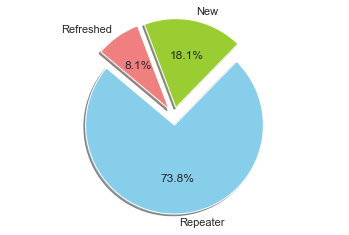

In [262]:
# Data to plot
labels = 'Repeater', 'New', 'Refreshed'
sizes = df_2['Percentage_of_Values']
colors = ['skyblue', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0.1, )  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

- 73.4% applicants are repeaters. Only, 18.4% are new clients.
Inference:

- Here we can see that maximum client are repeaters that means they applied for loan in past too.

In [263]:
# make a new data set for contract type
Contract_Type = preapp_data['NAME_CONTRACT_TYPE']
Contract_Type

0          Consumer loans
1              Cash loans
2              Cash loans
3              Cash loans
4              Cash loans
                ...      
1670209    Consumer loans
1670210    Consumer loans
1670211    Consumer loans
1670212        Cash loans
1670213        Cash loans
Name: NAME_CONTRACT_TYPE, Length: 1670214, dtype: object

In [264]:
#find the percentage of contract status 
df_3=round((Contract_Type.value_counts()/preapp_data["NAME_CONTRACT_TYPE"].count())*100,2)
df_3 = pd.DataFrame(df_3)
df_3.reset_index(level=0, inplace=True)
df_3.rename(columns=  {"index": "NAME_CONTRACT_TYPE", 
                     "NAME_CONTRACT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_3.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_3

,NAME_CONTRACT_TYPE,Percentage_of_Values
0,Cash loans,44.77
1,Consumer loans,43.67
2,Revolving loans,11.57


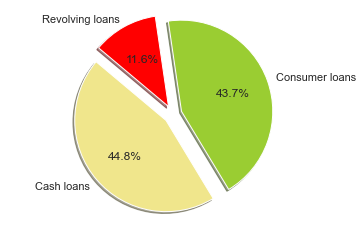

In [138]:
# Data to plot
labels = 'Cash loans', 'Consumer loans', 'Revolving loans',
sizes = df_3['Percentage_of_Values']
colors = ['khaki', 'yellowgreen', 'red']
explode = (0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

- 44.8% clients has applied for cash loans
- Very less, 11.6% clients have applied for revolving loans

##### Days of approval - WEEKDAY_APPR_PROCESS_START

In [265]:
# make a new dataset
Approval_days = preapp_data['WEEKDAY_APPR_PROCESS_START']
Approval_days

0           SATURDAY
1           THURSDAY
2            TUESDAY
3             MONDAY
4           THURSDAY
             ...    
1670209    WEDNESDAY
1670210      TUESDAY
1670211       MONDAY
1670212    WEDNESDAY
1670213       SUNDAY
Name: WEEKDAY_APPR_PROCESS_START, Length: 1670214, dtype: object

In [266]:
#find the percentage of contract status 
df_4=round((Approval_days.value_counts()/preapp_data["WEEKDAY_APPR_PROCESS_START"].count())*100,2)
df_4 = pd.DataFrame(df_4)
df_4.reset_index(level=0, inplace=True)
df_4.rename(columns=  {"index": "WEEKDAY_APPR_PROCESS_START", 
                     "WEEKDAY_APPR_PROCESS_START":"Percentage_of_Values"}, 
                                 inplace = True) 
df_4.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_4

,WEEKDAY_APPR_PROCESS_START,Percentage_of_Values
0,TUESDAY,15.27
1,WEDNESDAY,15.27
2,MONDAY,15.18
3,FRIDAY,15.09
4,THURSDAY,14.91
5,SATURDAY,14.41
6,SUNDAY,9.86


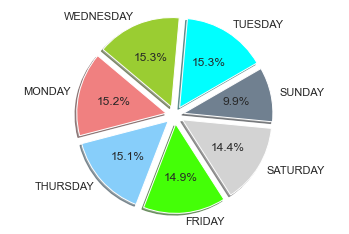

In [267]:
# Data to plot
labels = 'TUESDAY', 'WEDNESDAY', 'MONDAY', 'THURSDAY' , 'FRIDAY' , 'SATURDAY' , 'SUNDAY' 
sizes = df_4['Percentage_of_Values']
colors = ['aqua', 'yellowgreen', 'lightcoral', 'lightskyblue' , '#44FF07' ,'lightgray','slategray']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=30)

plt.axis('equal')
plt.show()

- It can be seen that clients applications come in same counts on all weekdays.

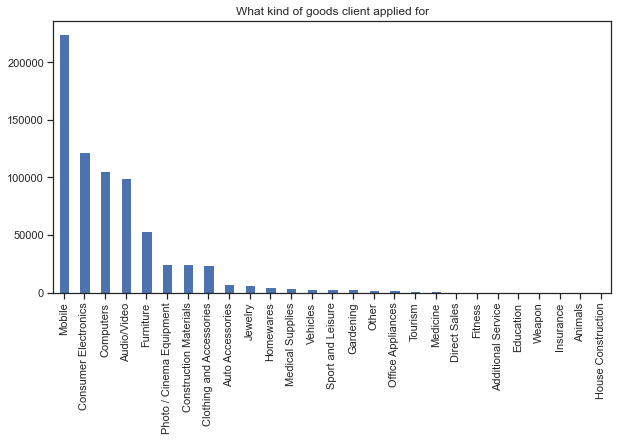

In [268]:
# plot for goos category client has applied for
plt.figure(figsize=(10,5))
preapp_data['NAME_GOODS_CATEGORY'].value_counts().plot.bar(title = 'What kind of goods client applied for')
plt.show()

- From the above plot we see that large count of clients have applied for loan to buy a phone according to the previous application data.

##### Portfolio of the clients loan applications in previous applications

In [269]:
Portfolio= preapp_data['NAME_PORTFOLIO']
#find the percentage of Portfolio
df_9=round((Portfolio.value_counts()/preapp_data["NAME_PORTFOLIO"].count())*100,2)
df_9 = pd.DataFrame(df_9)
df_9.reset_index(level=0, inplace=True)
df_9.rename(columns=  {"index": "NAME_PORTFOLIO", 
                     "NAME_PORTFOLIO":"Percentage_of_Values"}, 
                                 inplace = True) 
df_9.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_9

,NAME_PORTFOLIO,Percentage_of_Values
0,POS,53.24
1,Cash,35.56
2,Cards,11.17
3,Cars,0.03


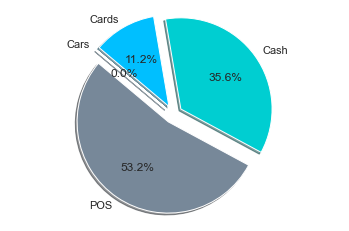

In [270]:
# Data to plot
labels = df_9.NAME_PORTFOLIO
sizes = df_9.Percentage_of_Values
colors = ['lightslategray', 'darkturquoise', 'deepskyblue', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Inference: 
1. 11.2% of previous application for cards
2. And we can say that very less previous application was for car and majority of them were for POS

##### From where the bank acquired the client on the previous application - CHANNEL_TYPE

In [271]:
Channel_Type= preapp_data['CHANNEL_TYPE']
#find the percentage of Channels via which client applied loan for
df_11=round((Channel_Type.value_counts()/preapp_data["CHANNEL_TYPE"].count())*100,2)
df_11 = pd.DataFrame(df_11)
df_11.reset_index(level=0, inplace=True)
df_11.rename(columns=  {"index": "CHANNEL_TYPE", 
                     "CHANNEL_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_11.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_11

,CHANNEL_TYPE,Percentage_of_Values
0,Credit and cash offices,43.11
1,Country-wide,29.62
2,Stone,12.70
3,Regional / Local,6.50
4,Contact center,4.27
5,AP+ (Cash loan),3.42
6,Channel of corporate sales,0.37
7,Car dealer,0.03


[Text(0, 0, 'Credit and cash offices'),
 Text(1, 0, 'Country-wide'),
 Text(2, 0, 'Stone'),
 Text(3, 0, 'Regional / Local'),
 Text(4, 0, 'Contact center'),
 Text(5, 0, 'AP+ (Cash loan)'),
 Text(6, 0, 'Channel of corporate sales'),
 Text(7, 0, 'Car dealer')]

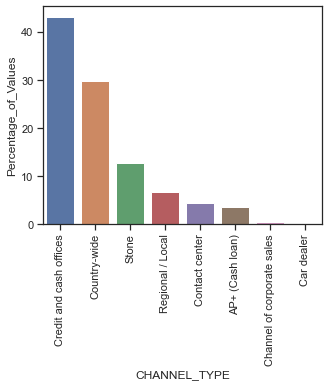

In [272]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("CHANNEL_TYPE","Percentage_of_Values",data=df_11)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Inferences:
- Most of the clients were aquired from Credit and Cash Offices
- Least clients applied due to channel of corporate sales and car dealers


### Merge the two data sets current applications and previous applications

In [273]:
prev_current_app_merge = pd.merge(preapp_data,app_data,how="inner",on="SK_ID_CURR")
prev_current_app_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 111 entries, SK_ID_PREV to AMT_CREDIT_RANGE
dtypes: category(1), float64(38), int32(1), int64(42), object(29)
memory usage: 1.2+ GB


In [274]:
# describe the merged dataframe
prev_current_app_merge.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,HOUR_APPR_PROCESS_START_x,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,1.413701e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,...,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06
mean,1.922744e+06,2.784813e+05,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,...,4.196078e-03,3.989528e-04,3.671215e-04,2.242341e-04,6.202833e-03,6.817196e-03,3.856572e-02,3.013734e-01,3.615394e-01,2.912612e+00
std,5.327153e+05,1.028118e+05,1.472491e+04,2.936222e+05,3.194813e+05,2.062030e+04,3.159376e+05,3.331474e+00,5.962560e-02,0.107784,...,6.464112e-02,1.996983e-02,1.915690e-02,1.497278e-02,8.188486e-02,1.065273e-01,2.136566e-01,9.802897e-01,9.257137e-01,2.199798e+00
min,1.000001e+06,1.000020e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.461346e+06,1.893640e+05,6.257858e+03,1.975050e+04,2.488050e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.922698e+06,2.789920e+05,1.122376e+04,7.087050e+04,8.059500e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
75%,2.384012e+06,3.675560e+05,2.042078e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
max,2.845381e+06,4.562550e+05,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,9.000000e+00,8.000000e+00,2.700000e+01,2.610000e+02,2.500000e+01


## Final interpretation of the analysis after the complete analysis

### To save the bank from credit loss and interest loss
   
   
   **The clients that are loan defaulters**
   
   - The clients with education type has more payment difficulties.
   - The clients that work as low skilled labourers are more more likely to default the loan as they have 17% chances.
   - For the purposes of loan the repair category of purpose from the clients are not able to pay the loans in time.
   
  
  
  
  
  **The clients that are non-defaulters**
   
   - The clients with education type secondary special and higher education are able to pay the loan.
   - The working and commercial associate females will no default the loan and pay the loan on time.
   - The pensioners , businessman and students have very less percentage of defaulting the loan.
   - The loan can also be aooroved for tthe clients that leave with their parents than the other clients with diffrent housing        categories